In [ ]:
import tensorflow as tf

In [2]:
import numpy as np
import matplotlib.pyplot as plt 

In [3]:
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras import layers
from tensorflow.keras import models

In [4]:
train_directory = "images/TRAIN/"
val_directory = "images/TEST/"

In [ ]:
train_dataset = image_dataset_from_directory(
    train_directory,
    image_size=(224,224),
    label_mode="categorical",
    batch_size=32,
    shuffle=True,
)

val_dataset = image_dataset_from_directory(
    val_directory,
    image_size=(224,224),
    label_mode="categorical",
     shuffle=True,
)

In [6]:
# argumentation
argument_layer = tf.keras.Sequential([
    layers.RandomRotation(factor = (-0.025, 0.025)),
    layers.RandomFlip(mode='horizontal',),
],name ="data_augmentation")

In [7]:
# argumentation
resize_rescale_layer = tf.keras.Sequential([
    layers.Resizing(224,224),
    layers.Rescaling(1./255),
],name ="data_resize_rescale")

In [8]:
train_dataset = train_dataset.map(lambda x, y: (argument_layer(x, training=True), y)).prefetch(tf.data.AUTOTUNE)

In [9]:
val_dataset = val_dataset.prefetch(tf.data.AUTOTUNE)

In [10]:
# Model creation
inputs = tf.keras.Input(shape=(None, None, 3))
x = resize_rescale_layer(inputs)
x = layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Dropout(0.5)(x)
x = layers.Flatten()(x)
x = layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(4, activation='softmax')(x)

model = tf.keras.Model(inputs, outputs)

In [11]:
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, None, None, 3)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ data_resize_rescale             │ (None, 224, 224, 3)    │             0 │
│ (Sequential)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 222, 222, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 394272)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │    25,233,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,234,756 (96.26 MB)

 Trainable params: 25,234,692 (96.26 MB)

 Non-trainable params: 64 (256.00 B)

In [12]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics = ['accuracy']
)

# Callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=5, restore_best_weights=True
)

reduce_lr_on_plateau = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', factor=0.1, patience=3, min_lr=1e-7
)

In [13]:
# Fit model
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=20,
    callbacks=[early_stopping, reduce_lr_on_plateau]
)

Epoch 1/20


2024-08-16 11:12:35.183623: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


312/312 ━━━━━━━━━━━━━━━━━━━━ 42s 130ms/step - accuracy: 0.2473 - loss: 3.7211 - val_accuracy: 0.2509 - val_loss: 1.7520 - learning_rate: 0.0010
Epoch 2/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 39s 123ms/step - accuracy: 0.2433 - loss: 1.7233 - val_accuracy: 0.2529 - val_loss: 1.6345 - learning_rate: 0.0010
Epoch 3/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 39s 123ms/step - accuracy: 0.2449 - loss: 1.6295 - val_accuracy: 0.2465 - val_loss: 5.8440 - learning_rate: 0.0010
Epoch 4/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 41s 131ms/step - accuracy: 0.2439 - loss: 1.5593 - val_accuracy: 0.2465 - val_loss: 1.5652 - learning_rate: 0.0010
Epoch 5/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 41s 132ms/step - accuracy: 0.2413 - loss: 1.6220 - val_accuracy: 0.2513 - val_loss: 1.5999 - learning_rate: 0.0010
Epoch 6/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 41s 131ms/step - accuracy: 0.2465 - loss: 1.5988 - val_accuracy: 0.2509 - val_loss: 1.5386 - learning_rate: 0.0010
Epoch 7/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 43s 137ms/step - accuracy: 0.2436 - loss:

In [14]:
model.evaluate(val_dataset)

78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.2456 - loss: 1.5386


[1.5385677814483643, 0.25090470910072327]

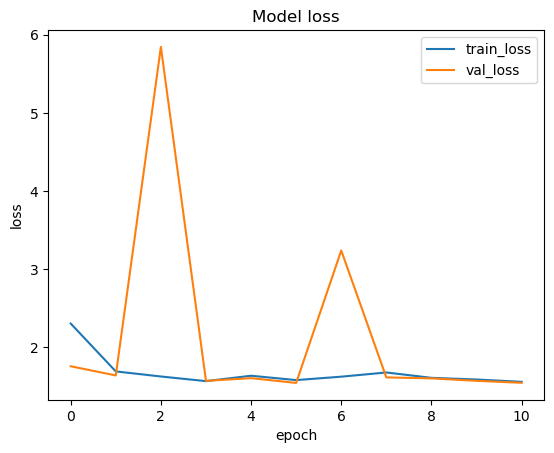

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

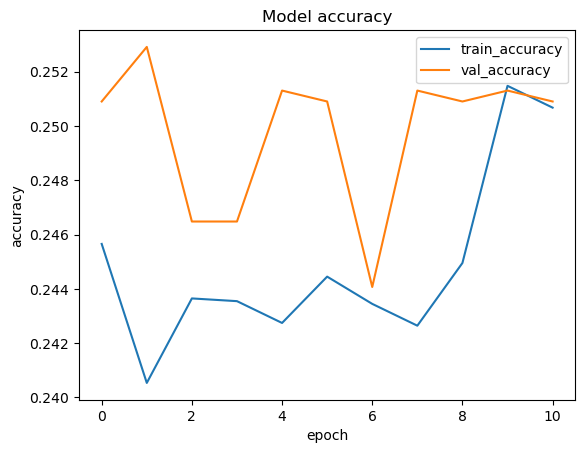

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy', 'val_accuracy'])
plt.show()